In [496]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
import warnings
from sklearn import datasets
import matplotlib.cbook
from matplotlib import cm

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

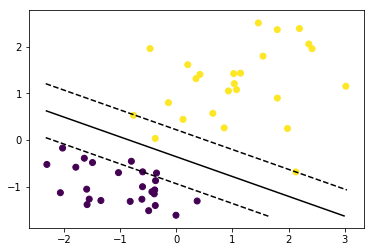

In [256]:
x_train, y_train=datasets.make_classification(n_samples=50, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=2,
                                         n_clusters_per_class=1)
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma=10)
clf.fit(x_train,y_train)
x0, x1 = np.meshgrid(np.linspace(x_train[:,0].min()-0.02, x_train[:,0].max()+0.02, 100), np.linspace(x_train[:,1].min()-0.02, x_train[:,1].max()+0.02, 100))
Z = clf.decision_function(np.c_[x0.ravel(), x1.ravel()])
Z = Z.reshape(x0.shape)
plt.contour(x0,x1,Z,linestyles=['--', '-', '--'],colors='k' ,levels=[-1, 0, 1])
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

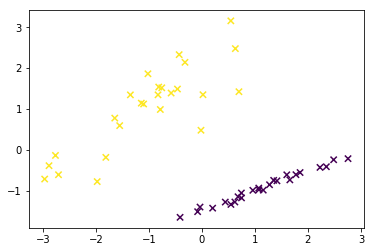

In [278]:
x_train, y_train=datasets.make_classification(n_samples=50, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=2,
                                         n_clusters_per_class=1)
yy_train=np.copy(y_train)
for i, item  in  enumerate(y_train):
    if item==0:
        yy_train[i]=-1   
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.show()

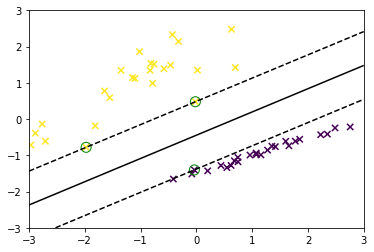

In [287]:
#SVM WITH SMO
def kk1(xn, xm):
    xnm=xn@xm.T
    return xnm
iteration=1000
decay=0.95
C=100
lest=1e-6
class SVM():
    def __init__(self,ker):
        self.kernel=ker
    def fit(self,X,t,x):
        t2 = t.T@t
        a = np.zeros(len(t)) + C
        G = self.kernel(X, X)
        H = t * t.reshape(len(t),1) * G
        lrate=0.1
        while lrate>=lest:
            for i in range(iteration):
                grad=1-H@a
                atemp=a+lrate*grad
                a=atemp- (atemp @ t) * t / t2
                np.clip(a, 0, C, out=a)
            self.X = X[a!=0]
            self.t = t[a!=0]
            self.a = a[a!=0]
            self.b = np.sum(self.t - np.sum(self.a * self.t* self.kernel(self.X, self.X),axis=-1))/len(self.t)  
            lrate =lrate* decay
    def distance(self, x):
        d = np.sum(self.a * self.t* self.kernel(x, self.X),axis=-1) + self.b
        return d

x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
x = np.array([x0, x1]).reshape(2, -1).T
model=SVM(kk1)
model.fit(x_train,yy_train,x)
X=model.X
D=model.distance(x)
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(X[:, 0], X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1,D.reshape(x0.shape),np.array([-1, 0, 1]), colors="k", linestyles=['--', '-', '--'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()         

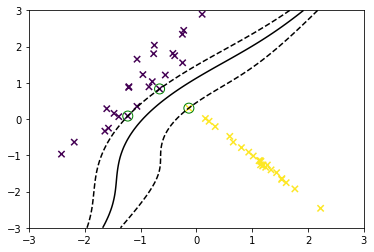

In [324]:
#gaussian kernel
x_train, y_train=datasets.make_classification(n_samples=50, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=2,
                                         n_clusters_per_class=1)
yy_train=np.copy(y_train)
for i, item  in  enumerate(y_train):
    if item==0:
        yy_train[i]=-1   
def pairwise(x, y):   
    return (np.tile(x, (len(y), 1, 1)).transpose(1, 0, 2),np.tile(y, (len(x), 1, 1)))
def kk2(x,y):
    x, y = pairwise(x, y)
    deg=x.ndim
    return (np.sum(x * y, axis=-1) +0.5 ) **deg
 
model=SVM(kk2)
model.fit(x_train,yy_train,x)
X=model.X
D=model.distance(x)
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(X[:, 0], X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1,D.reshape(x0.shape),np.array([-1, 0, 1]), colors="k", linestyles=['--', '-', '--'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()         

In [542]:
n=10
x_tr=np.linspace(0,1,n)
t_tr=np.sin(x_tr*2*np.pi)
def pairwise(x, y):   
    return (np.tile(x, (len(y), 1, 1)).transpose(1, 0, 2),np.tile(y, (len(x), 1, 1)))
def kk1(x,y):
    x, y = pairwise(x, y)
    deg=x.ndim
    return (np.sum(x * y, axis=-1)+0.4) **deg
def is_invertible(a):
     return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]
class RVMreg():
    def __init__(self,ker,a,b):
        self.kernel=ker
        self.a=a
        self.b=b
    def fit(self,X,t):
        X = X[:, None]
        PHI=self.kernel(X,X)
        self.a=np.zeros(len(t))+self.a
        for i in range(iteration):
            params = np.hstack([self.a, self.b]) 
            A=np.diag(self.a)
            SIG=A+self.b*PHI.T@PHI
            if (is_invertible(SIG)==False):
                break
            SIGG=np.linalg.inv(SIG)
            m=self.b*SIGG@PHI.T@t
            gamma=np.ones_like(t)-self.a*np.diag(SIG)
            self.a=gamma/np.square(m)
            np.clip(self.a, 0, 1e10, out=self.a)
            self.b=(len(t)-SIG@gamma)/np.sum((t-PHI@m)**2)
            if np.allclose(params, np.hstack([self.a, self.b])):
                break
        mask = self.a < 10
        self.X = X[mask]
        self.t = t[mask]
        self.a = self.a[mask]
        PHI = self.kernel(self.X, self.X)
        SIG = np.diag(self.a) + self.b * PHI.T @ PHI
        self.SIGG = np.linalg.inv(SIG)
        self.mean = self.b * self.SIGG @ PHI.T @ self.t
    def predict(self,x):
        x = x[:, None]
        phi=self.kernel(x,self.X)
        mean=phi@self.mean
        var =np.abs(np.sum(phi @ self.SIGG * phi, axis=1))
        return mean,np.sqrt(var)


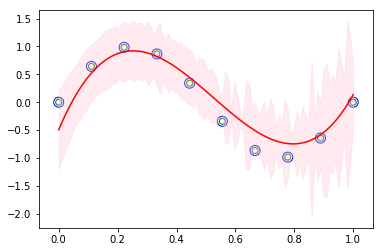

In [348]:
a1=np.ones(n)+0.02
a2=np.zeros(n)+np.random.randn(n)/10000
x=np.linspace(0,1,100)
iteration=2000
reg=RVMreg(kk1,a1,a2)
reg.fit(x_tr,t_tr)
y,y_std=reg.predict(x)
plt.scatter(x_tr, t_tr, facecolor="none", edgecolor="g")
plt.scatter(reg.X, reg.t, s=100, facecolor="none", edgecolor="b")
plt.plot(x, y, color="r", label="predict mean")
plt.fill_between(x, y - y_std, y + y_std, color="pink", alpha=0.3)
plt.show()


In [574]:
class RVMC(object):

    def __init__(self, kernel, a):
        self.kernel = kernel
        self.a = a

    def sigmoid(self, a):
        return np.tanh(a/2) /2 + 0.5

    def est(self, X, t, w):
        PHI=self.kernel(X,X)
        for i in range(100):
            y = self.sigmoid(PHI @ w)
            g = PHI.T @ (y - t) + self.a * w
            H = (PHI.T * y * (1 - y)) @ PHI + np.diag(self.a)
            w =w-np.linalg.inv(H)@g
        return w, np.linalg.inv(H)

    def fit(self, X, t):
        mean = np.zeros(len(t))
        for _ in range(100):
            mean, cov = self.est(X, t, mean)
            gamma = 1 - self.a * np.diag(cov)
            self.a = gamma / np.square(mean)
            np.clip(self.a, 0, 1e10, out=self.a)
        self.X = X[self.a < 1e8,:]
        self.t = t[self.a < 1e8]
        mean = mean[self.a < 1e8]
        self.a = self.a[self.a < 1e8]
        self.mean, self.covariance = self.est(self.X, self.t, mean)

    def predict(self, X):
        phi = self.kernel(X, self.X)
        label = (phi @ self.mean > 0).astype(np.int)
        return label



In [544]:
n=20
x_train, y_train=datasets.make_classification(n_samples=n, 
                                         n_features=2,
                                         n_informative=2,
                                         n_redundant=0,
                                         n_repeated=0, 
                                         n_classes=2,
                                         n_clusters_per_class=1)

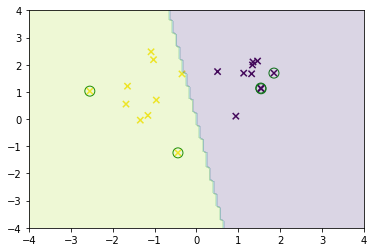

In [575]:
a1=np.ones(n)
model = RVMC(kk1,a1)
model.fit(x_train, y_train)
x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contourf(x0, x1, model.predict(x).reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.show()